In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
# https://www.sleepfoundation.org/sleep-apnea/ahi

In [3]:
sleep_record_df = pd.read_csv('SLEEP_RECORD.csv')

In [4]:
sleep_record_df

,PATIENT_ID,SORT_KEY,USAGE_HOURS,FG_SERIAL_NO,SESSION_DATE,MODE,SLEEP_SCORE,AHI_SCORE,LEAK_SCORE,MASK_SCORE,...,SEQUENCENUMBER,SIZEBYTES,STREAMVIEWTYPE,RECORD_DELETE_IND,DATA_LOAD_SOURCE,DATA_UPDATE_SOURCE,DATA_LOAD_TIME,DATA_UPDATE_TIME,RECORD_MD5,SOURCE_SYSTEM_ID
0,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-24,7.52,23223801940,2023-02-24T00:00:00.000Z,AutoSet,79,5,0,4,...,26216762600000000001300242604,767,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-02-25T04:30:24.639Z,2023-02-25T22:30:26.354Z,NaN,5
1,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-05,4.00,23223801940,2023-05-05T00:00:00.000Z,AutoSet,50,5,0,5,...,28963392200000000043747702059,413,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-06T17:33:29.382Z,2023-05-06T17:33:29.382Z,NaN,5
2,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-16,5.47,23223801940,2023-05-16T00:00:00.000Z,AutoSet,65,5,0,5,...,29410390800000000044156602695,414,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-17T17:31:32.787Z,2023-05-17T17:31:32.787Z,NaN,5
3,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-03-06,5.00,23223801940,2023-03-06T00:00:00.000Z,AutoSet,62,4,4,4,...,26604875400000000038444937645,766,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-03-07T10:30:26.287Z,2023-03-07T22:30:24.858Z,NaN,5
4,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-03-12,4.57,23223801940,2023-03-12T00:00:00.000Z,AutoSet,61,5,5,5,...,26820299600000000004297665369,414,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-03-13T11:30:16.979Z,2023-03-13T11:30:16.979Z,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-25,8.13,23223801940,2023-02-25T00:00:00.000Z,AutoSet,80,5,0,5,...,26248611600000000033841510158,761,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-02-25T22:30:26.354Z,2023-02-26T16:30:35.434Z,NaN,5
79,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-04-27,0.00,23223801940,2023-04-27T00:00:00.000Z,NaN,20,0,20,0,...,28665003100000000023553075615,324,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-04-28T23:31:08.315Z,2023-04-28T23:31:08.315Z,NaN,5
80,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-11,5.55,23223801940,2023-05-11T00:00:00.000Z,AutoSet,66,5,0,5,...,29206896800000000009636029942,412,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-12T17:31:30.222Z,2023-05-12T17:31:30.222Z,NaN,5
81,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-13,0.00,23223801940,2023-05-13T00:00:00.000Z,NaN,20,0,20,0,...,29297017700000000009756689056,324,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-14T23:30:33.004Z,2023-05-14T23:30:33.004Z,NaN,5


In [5]:
sleep_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PATIENT_ID                   83 non-null     object 
 1   SORT_KEY                     83 non-null     object 
 2   USAGE_HOURS                  83 non-null     float64
 3   FG_SERIAL_NO                 83 non-null     int64  
 4   SESSION_DATE                 83 non-null     object 
 5   MODE                         79 non-null     object 
 6   SLEEP_SCORE                  83 non-null     int64  
 7   AHI_SCORE                    83 non-null     int64  
 8   LEAK_SCORE                   83 non-null     int64  
 9   MASK_SCORE                   83 non-null     int64  
 10  USAGE_SCORE                  83 non-null     int64  
 11  MASK_SESSION_COUNT           83 non-null     int64  
 12  AHI                          79 non-null     float64
 13  LEAK_50_PERCENTILE    

In [6]:
print(sleep_record_df.apply(lambda col: col.unique()))

PATIENT_ID                                                [00uhdtmtv4WYdSYQ8297]
SORT_KEY                       [SLEEP_RECORD#2023-02-24, SLEEP_RECORD#2023-05...
USAGE_HOURS                    [7.52, 4.0, 5.47, 5.0, 4.57, 5.73, 3.57, 4.18,...
FG_SERIAL_NO                                                       [23223801940]
SESSION_DATE                   [2023-02-24T00:00:00.000Z, 2023-05-05T00:00:00...
MODE                                                              [AutoSet, nan]
SLEEP_SCORE                    [79, 50, 65, 62, 61, 67, 46, 52, 68, 32, 87, 5...
AHI_SCORE                                                        [5, 4, 3, 0, 2]
LEAK_SCORE                            [0, 4, 5, 7, 6, 2, 10, 9, 20, 1, 8, 3, 17]
MASK_SCORE                                                          [4, 5, 0, 3]
USAGE_SCORE                    [70, 40, 55, 50, 46, 57, 36, 42, 58, 22, 69, 3...
MASK_SESSION_COUNT                                               [3, 1, 2, 0, 4]
AHI                         

In [7]:
sleep_record_df['DateTime'] = pd.to_datetime(sleep_record_df['SESSION_DATE'])

In [8]:
print(type(sleep_record_df.DateTime[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
sleep_record_df['Date'] = pd.to_datetime(sleep_record_df['DateTime']).dt.date

In [10]:
sleep_record_df.head()

,PATIENT_ID,SORT_KEY,USAGE_HOURS,FG_SERIAL_NO,SESSION_DATE,MODE,SLEEP_SCORE,AHI_SCORE,LEAK_SCORE,MASK_SCORE,...,STREAMVIEWTYPE,RECORD_DELETE_IND,DATA_LOAD_SOURCE,DATA_UPDATE_SOURCE,DATA_LOAD_TIME,DATA_UPDATE_TIME,RECORD_MD5,SOURCE_SYSTEM_ID,DateTime,Date
0,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-24,7.52,23223801940,2023-02-24T00:00:00.000Z,AutoSet,79,5,0,4,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-02-25T04:30:24.639Z,2023-02-25T22:30:26.354Z,NaN,5,2023-02-24 00:00:00+00:00,2023-02-24
1,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-05,4.00,23223801940,2023-05-05T00:00:00.000Z,AutoSet,50,5,0,5,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-06T17:33:29.382Z,2023-05-06T17:33:29.382Z,NaN,5,2023-05-05 00:00:00+00:00,2023-05-05
2,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-16,5.47,23223801940,2023-05-16T00:00:00.000Z,AutoSet,65,5,0,5,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-17T17:31:32.787Z,2023-05-17T17:31:32.787Z,NaN,5,2023-05-16 00:00:00+00:00,2023-05-16
3,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-03-06,5.00,23223801940,2023-03-06T00:00:00.000Z,AutoSet,62,4,4,4,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-03-07T10:30:26.287Z,2023-03-07T22:30:24.858Z,NaN,5,2023-03-06 00:00:00+00:00,2023-03-06
4,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-03-12,4.57,23223801940,2023-03-12T00:00:00.000Z,AutoSet,61,5,5,5,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-03-13T11:30:16.979Z,2023-03-13T11:30:16.979Z,NaN,5,2023-03-12 00:00:00+00:00,2023-03-12


In [11]:
sleep_record_df = sleep_record_df.sort_values(by='Date')

In [12]:
print(sleep_record_df.columns.values)

['PATIENT_ID' 'SORT_KEY' 'USAGE_HOURS' 'FG_SERIAL_NO' 'SESSION_DATE'
 'MODE' 'SLEEP_SCORE' 'AHI_SCORE' 'LEAK_SCORE' 'MASK_SCORE' 'USAGE_SCORE'
 'MASK_SESSION_COUNT' 'AHI' 'LEAK_50_PERCENTILE' 'LEAK_70_PERCENTILE'
 'LEAK_95_PERCENTILE' 'EXPIRATION_TIMESTAMP' 'EVENTID' 'EVENTNAME'
 'EVENTVERSION' 'EVENTSOURCE' 'AWSREGION' 'EVENTSOURCEARN'
 'APPROXIMATECREATIONDATETIME' 'SEQUENCENUMBER' 'SIZEBYTES'
 'STREAMVIEWTYPE' 'RECORD_DELETE_IND' 'DATA_LOAD_SOURCE'
 'DATA_UPDATE_SOURCE' 'DATA_LOAD_TIME' 'DATA_UPDATE_TIME' 'RECORD_MD5'
 'SOURCE_SYSTEM_ID' 'DateTime' 'Date']


In [13]:
sleep_record_df

,PATIENT_ID,SORT_KEY,USAGE_HOURS,FG_SERIAL_NO,SESSION_DATE,MODE,SLEEP_SCORE,AHI_SCORE,LEAK_SCORE,MASK_SCORE,...,STREAMVIEWTYPE,RECORD_DELETE_IND,DATA_LOAD_SOURCE,DATA_UPDATE_SOURCE,DATA_LOAD_TIME,DATA_UPDATE_TIME,RECORD_MD5,SOURCE_SYSTEM_ID,DateTime,Date
57,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-23,4.92,23223801940,2023-02-23T00:00:00.000Z,AutoSet,60,5,2,4,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-02-24T16:39:36.144Z,2023-02-24T16:39:36.144Z,NaN,5,2023-02-23 00:00:00+00:00,2023-02-23
0,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-24,7.52,23223801940,2023-02-24T00:00:00.000Z,AutoSet,79,5,0,4,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-02-25T04:30:24.639Z,2023-02-25T22:30:26.354Z,NaN,5,2023-02-24 00:00:00+00:00,2023-02-24
78,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-25,8.13,23223801940,2023-02-25T00:00:00.000Z,AutoSet,80,5,0,5,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-02-25T22:30:26.354Z,2023-02-26T16:30:35.434Z,NaN,5,2023-02-25 00:00:00+00:00,2023-02-25
34,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-26,3.78,23223801940,2023-02-26T00:00:00.000Z,AutoSet,46,5,0,3,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-02-27T04:30:20.690Z,2023-02-27T22:30:27.150Z,NaN,5,2023-02-26 00:00:00+00:00,2023-02-26
17,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-02-27,5.58,23223801940,2023-02-27T00:00:00.000Z,AutoSet,64,3,0,5,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-02-28T10:30:17.096Z,2023-02-28T16:30:46.765Z,NaN,5,2023-02-27 00:00:00+00:00,2023-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-12,2.42,23223801940,2023-05-12T00:00:00.000Z,AutoSet,36,5,2,5,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-13T11:30:31.051Z,2023-05-13T17:31:07.248Z,NaN,5,2023-05-12 00:00:00+00:00,2023-05-12
81,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-13,0.00,23223801940,2023-05-13T00:00:00.000Z,NaN,20,0,20,0,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-14T23:30:33.004Z,2023-05-14T23:30:33.004Z,NaN,5,2023-05-13 00:00:00+00:00,2023-05-13
65,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-14,5.75,23223801940,2023-05-14T00:00:00.000Z,AutoSet,68,5,0,5,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-15T17:30:48.198Z,2023-05-15T17:30:48.198Z,NaN,5,2023-05-14 00:00:00+00:00,2023-05-14
75,00uhdtmtv4WYdSYQ8297,SLEEP_RECORD#2023-05-15,6.28,23223801940,2023-05-15T00:00:00.000Z,AutoSet,73,5,0,5,...,NEW_AND_OLD_IMAGES,N,NaN,NaN,2023-05-16T17:31:21.408Z,2023-05-16T17:31:21.408Z,NaN,5,2023-05-15 00:00:00+00:00,2023-05-15


In [14]:
rj_sleep = sleep_record_df[['USAGE_HOURS', 'SLEEP_SCORE', 'AHI_SCORE', 'LEAK_SCORE',
                                           'MASK_SCORE', 'MASK_SESSION_COUNT', 'AHI', 'LEAK_50_PERCENTILE',
                                           'LEAK_70_PERCENTILE', 'LEAK_95_PERCENTILE','Date']].reset_index(drop=True)

In [15]:
rj_sleep

,USAGE_HOURS,SLEEP_SCORE,AHI_SCORE,LEAK_SCORE,MASK_SCORE,MASK_SESSION_COUNT,AHI,LEAK_50_PERCENTILE,LEAK_70_PERCENTILE,LEAK_95_PERCENTILE,Date
0,4.92,60,5,2,4,3,4.6,36.0,39.6,50.4,2023-02-23
1,7.52,79,5,0,4,3,3.7,45.6,50.4,67.2,2023-02-24
2,8.13,80,5,0,5,2,2.2,69.6,78.0,106.8,2023-02-25
3,3.78,46,5,0,3,4,0.0,43.2,52.8,68.4,2023-02-26
4,5.58,64,3,0,5,2,11.1,36.0,40.8,66.0,2023-02-27
...,...,...,...,...,...,...,...,...,...,...,...
78,2.42,36,5,2,5,1,6.2,39.6,43.2,50.4,2023-05-12
79,0.00,20,0,20,0,0,NaN,NaN,NaN,NaN,2023-05-13
80,5.75,68,5,0,5,1,1.2,52.8,61.2,69.6,2023-05-14
81,6.28,73,5,0,5,1,0.6,55.2,60.0,70.8,2023-05-15


In [16]:
print(rj_sleep['MASK_SESSION_COUNT'].value_counts())

1    49
2    17
3    10
0     4
4     3
Name: MASK_SESSION_COUNT, dtype: int64


In [17]:
# plt.rcParams["figure.figsize"] = [10, 3.5]
# plt.rcParams["figure.autolayout"] = True
# fig = plt.figure()
# x = rj_sleep['Date']
# y = rj_sleep['USAGE_HOURS']
# plt.plot(x,y)
# plt.xlabel("Date of Use")
# plt.ylabel("Hours of Use")
# plt.axhline(y=np.nanmean(rj_sleep['USAGE_HOURS']), color='red', linestyle = 'dotted', linewidth=3, label='Avg')
# spacing = 0.100
# fig.subplots_adjust(bottom=spacing)
# plt.show()

In [18]:
rj_sleep['Rolling 7 Day Average - Hours of Use'] = rj_sleep.USAGE_HOURS.rolling(7).mean()
rj_sleep['Rolling 30 Day Average - Hours of Use'] = rj_sleep.USAGE_HOURS.rolling(30).mean()

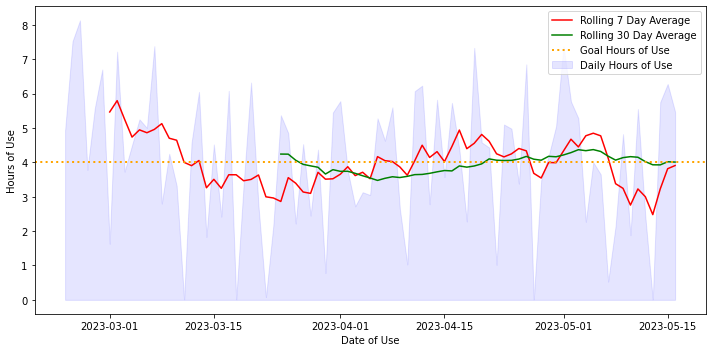

In [36]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
x = rj_sleep['Date']
y = rj_sleep['USAGE_HOURS']
# plt.plot(x,y)
plt.xlabel("Date of Use")
plt.ylabel("Hours of Use")
plt.fill_between(x, y, label = "Daily Hours of Use",color = "blue", alpha=0.1)
plt.plot(x, rj_sleep['Rolling 7 Day Average - Hours of Use'], label = 'Rolling 7 Day Average',color='red' ,alpha=1)
plt.plot(x, rj_sleep['Rolling 30 Day Average - Hours of Use'], label = 'Rolling 30 Day Average',color='green' ,alpha=1)
plt.axhline(y=4.0, color='orange', linestyle = 'dotted', linewidth=2, label='Goal Hours of Use')
plt.legend()
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
# plt.savefig("rolling average")
plt.show()

In [20]:
# rj_sleep_trimmed = rj_sleep[['USAGE_HOURS','SLEEP_SCORE','AHI','LEAK_SCORE','MASK_SCORE','MASK_SESSION_COUNT']]

rj_sleep_trimmed = rj_sleep[['USAGE_HOURS','SLEEP_SCORE','AHI','MASK_SESSION_COUNT']]

In [21]:
corr_matrix = rj_sleep_trimmed.corr()
corr_matrix

,USAGE_HOURS,SLEEP_SCORE,AHI,MASK_SESSION_COUNT
USAGE_HOURS,1.000000,0.979904,0.246383,0.263814
SLEEP_SCORE,0.979904,1.000000,0.215631,0.202568
AHI,0.246383,0.215631,1.000000,0.149806
MASK_SESSION_COUNT,0.263814,0.202568,0.149806,1.000000


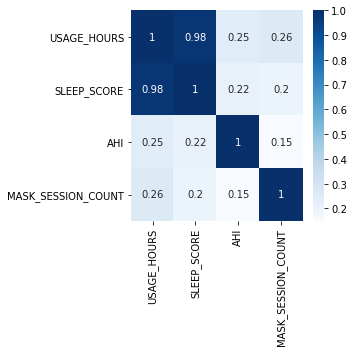

In [24]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sn.heatmap(rj_sleep_trimmed.corr(), annot=True, cmap='Blues')